In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras import layers
from sklearn.metrics import confusion_matrix

In [ ]:
from keras.datasets import fashion_mnist
# load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


#I - Analyse des données 

In [ ]:
# Compter le nombre de classes dans les données
num_classes = len(set(y_train))

# Afficher le nombre de classes
print("Nombre de classes dans le dataset Fashion MNIST :", num_classes)

Nombre de classes dans le dataset Fashion MNIST : 10


Le dataset Fashion MNIST contient 10 classes différentes, chacune représentant un type de vêtement différent. Les classes sont les suivantes :

T-shirt/top;
Trouser;
Pullover;
Dress;
Coat;
Sandal;
Shirt;
Sneaker;
Bag;
Ankle boot

In [ ]:
# Compter le nombre d'images par classe
num_images = np.zeros(10)
for label in range(10):
    num_images[label] = np.sum(y_train == label)

# Afficher le nombre d'images par classe
print("Nombre d'images par classe dans le dataset Fashion MNIST :")
for label in range(10):
    print("Classe", label, ":", int(num_images[label]), "images")

Nombre d'images par classe dans le dataset Fashion MNIST :
Classe 0 : 6000 images
Classe 1 : 6000 images
Classe 2 : 6000 images
Classe 3 : 6000 images
Classe 4 : 6000 images
Classe 5 : 6000 images
Classe 6 : 6000 images
Classe 7 : 6000 images
Classe 8 : 6000 images
Classe 9 : 6000 images


In [ ]:
# Afficher la forme des tableaux d'images et d'étiquettes
print("Forme des tableaux d'images d'entraînement :", X_train.shape)
print("Forme des tableaux d'images de test :", X_test.shape)

Forme des tableaux d'images d'entraînement : (60000, 28, 28)
Forme des tableaux d'images de test : (10000, 28, 28)


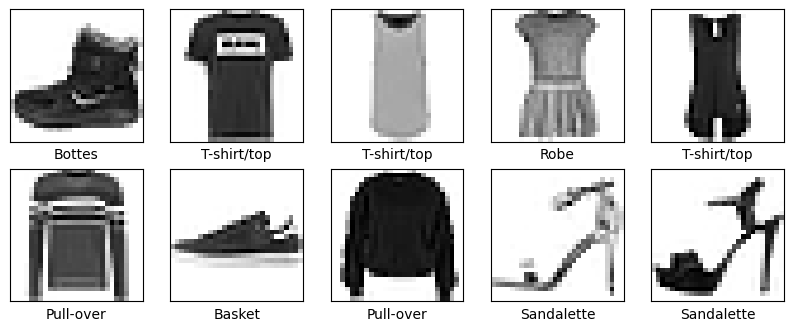

In [ ]:
# Définir les noms de classe
class_names = ['T-shirt/top', 'Pantalon', 'Pull-over', 'Robe', 'Manteau',
               'Sandalette', 'Chemise', 'Basket', 'Sac', 'Bottes']

# Afficher les 10 premières images avec leur nom de classe en titre
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([]) #enleve les graduations
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
# Appliquer l'analyse en composantes principales (ACP) pour réduire la dimensionnalité à 2
X_train1 = X_train.reshape(X_train.shape[0], -1)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train1)

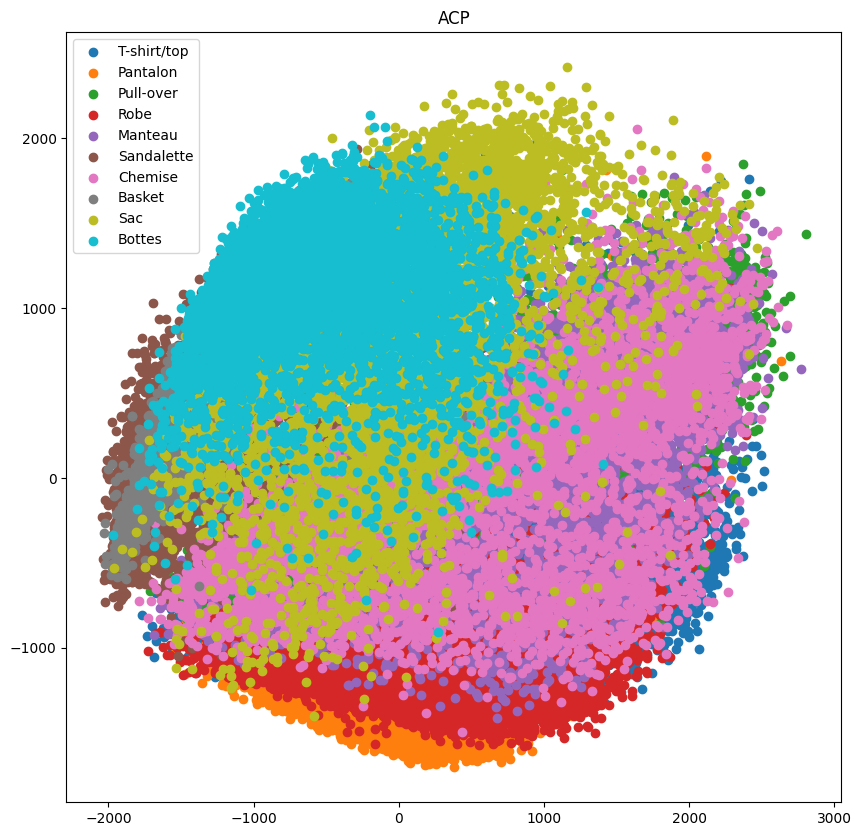

In [ ]:
# Créer un nuage de points pour chaque classe
plt.figure(figsize=(10, 10))
for i in range(len(class_names)):
    plt.scatter(X_train_pca[y_train==i, 0], X_train_pca[y_train==i, 1], label=class_names[i])
plt.title('ACP')
plt.legend()
plt.show()


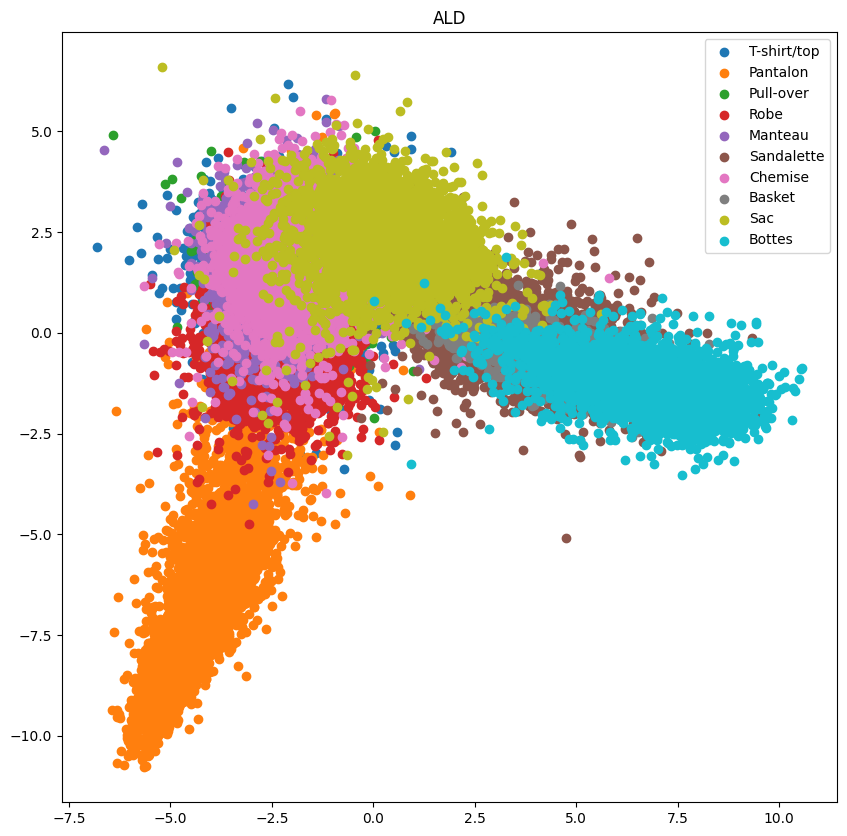

In [ ]:
# Effectuer une analyse linéaire discriminante (ALD)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_train1, y_train)

# Créer un nuage de points pour chaque classe
plt.figure(figsize=(10, 10))
for i in range(len(class_names)):
    plt.scatter(X_lda[y_train==i, 0], X_lda[y_train==i, 1], label=class_names[i])
plt.title('ALD')
plt.legend()
plt.show()

In [ ]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train1)

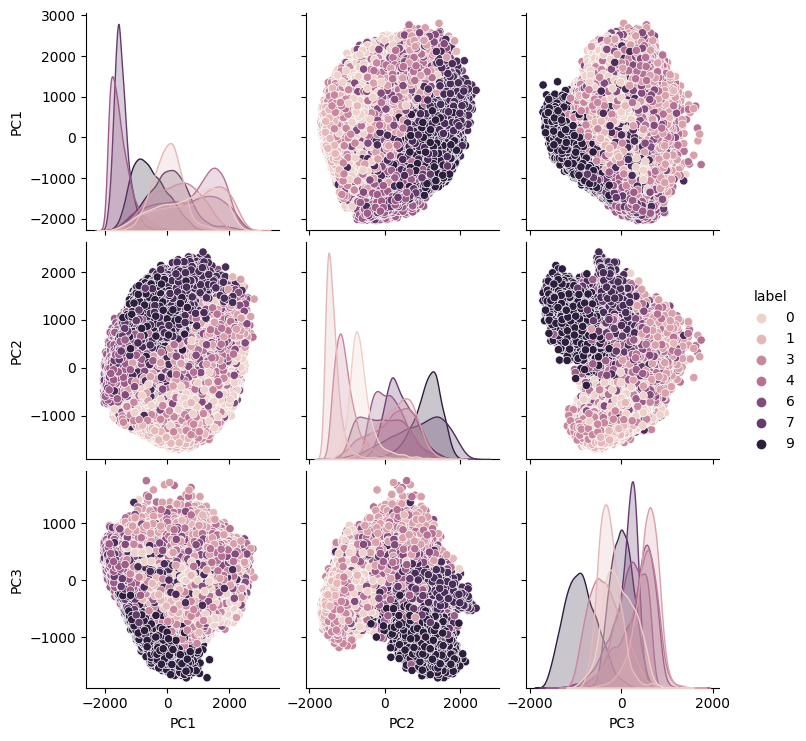

In [ ]:
# Créer un DataFrame avec les données réduites et les étiquettes
df = pd.DataFrame({'PC1': X_train_pca[:, 0], 'PC2': X_train_pca[:, 1], 'PC3': X_train_pca[:, 2], 'label': y_train})

# Créer un diagramme de paire avec Seaborn
sns.pairplot(df, hue='label')

plt.show()

In [ ]:
# Effectuer une analyse linéaire discriminante (ALD)
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit_transform(X_train, y_train)

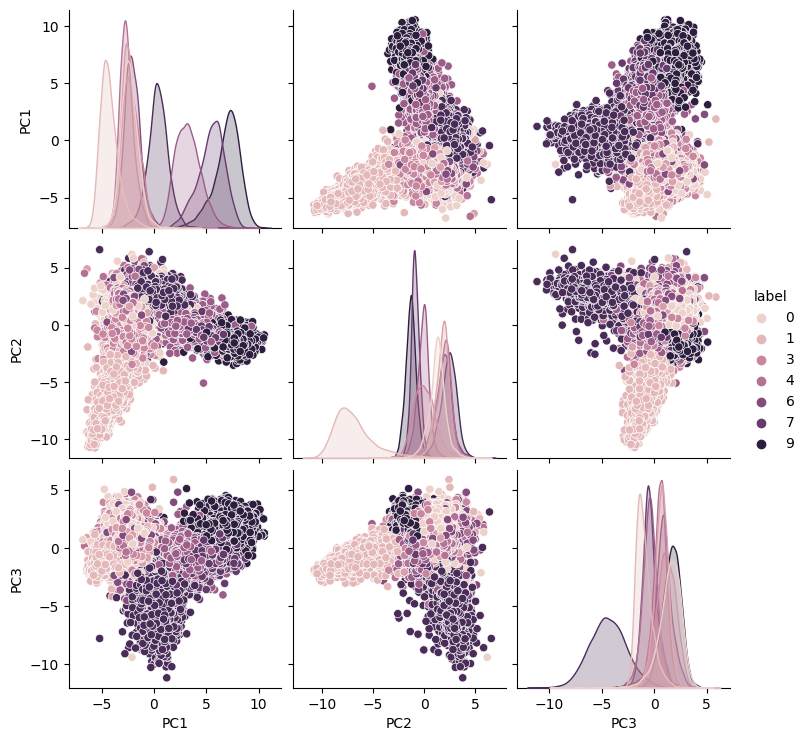

In [ ]:
# Créer un DataFrame avec les données réduites et les étiquettes
df = pd.DataFrame({'PC1': X_lda[:, 0], 'PC2': X_lda[:, 1],'PC3': X_lda[:, 2], 'label': y_train})

# Créer un diagramme de paire avec Seaborn
sns.pairplot(df, hue='label')

plt.show()

#II - Classification par réseau dense

In [ ]:
#Convertit le format
images = X_train.astype(float)
images_test = X_test.astype(float)

#On normalise
images = images/255
images_test = images_test/255


In [ ]:
#Construction du réseau de neurone
model = Sequential()

model.add(layers.Flatten(input_shape=[28,28]))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#On Compile le modèle
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

In [ ]:
history = model.fit(images, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2204 - accuracy: 0.9182 - val_loss: 0.3165 - val_accuracy: 0.8892
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2070 - accuracy: 0.9231 - val_loss: 0.3195 - val_accuracy: 0.8926
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2019 - accuracy: 0.9229 - val_loss: 0.3408 - val_accuracy: 0.8915
Epoch 4/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1944 - accuracy: 0.9260 - val_loss: 0.3331 - val_accuracy: 0.8929
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1869 - accuracy: 0.9293 - val_loss: 0.3282 - val_accuracy: 0.8972
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1830 - accuracy: 0.9310 - val_loss: 0.3447 - val_accuracy: 0.8938
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1758 - accuracy: 0.9332 - val_loss: 0.3448 - val_acc

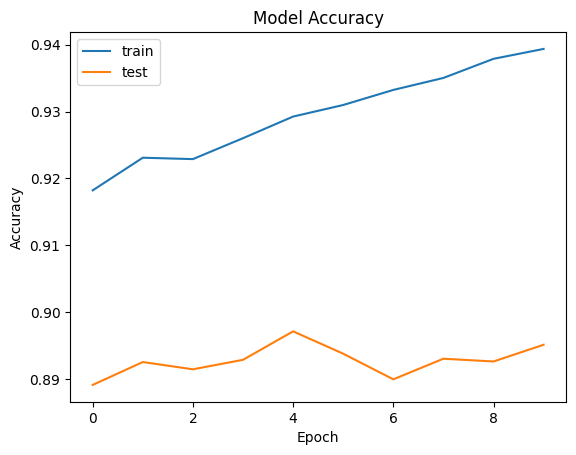

In [ ]:
#Trace les courbes d'évolution de la fonction Loss ainsi que de l'accuracy du modèle lors des itérations
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

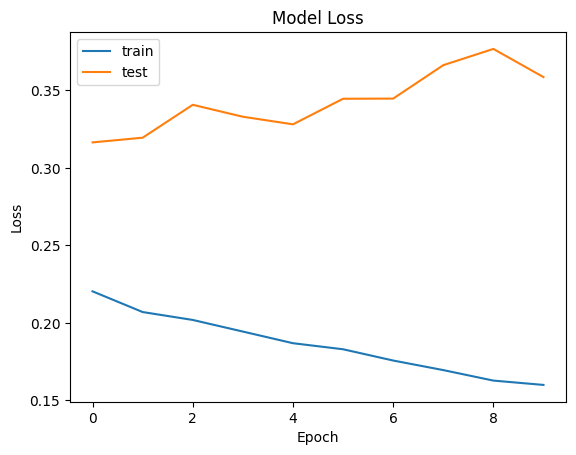

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

313/313 [==============================] - 1s 2ms/step


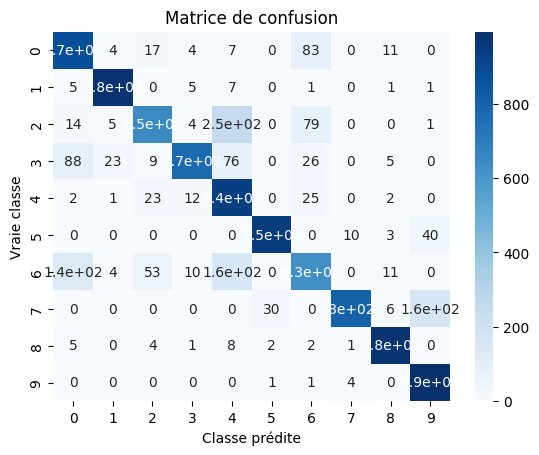

In [ ]:
#Reduire la taille des données pour aller plus vite
# Predict classes for test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
conf_mat = confusion_matrix(y_test,y_pred)

#Affiche la matrice de confusion
sns.heatmap(conf_mat,annot = True, cmap = 'Blues')
plt.title('Matrice de confusion')
plt.xlabel('Classe prédite')
plt.ylabel('Vraie classe')
plt.show()

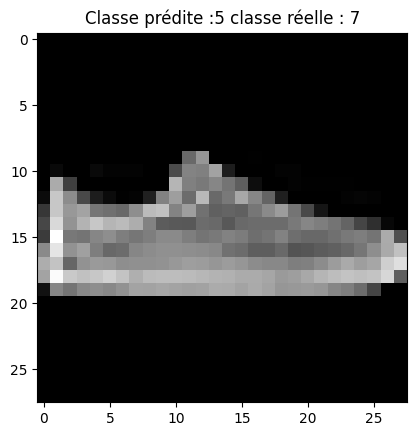

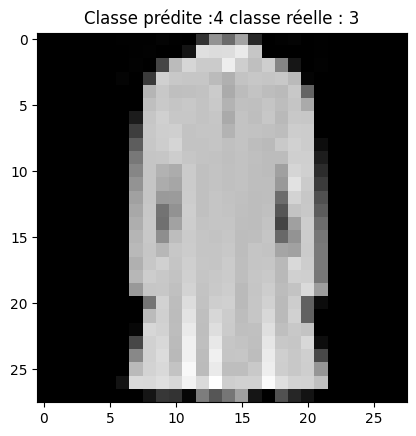

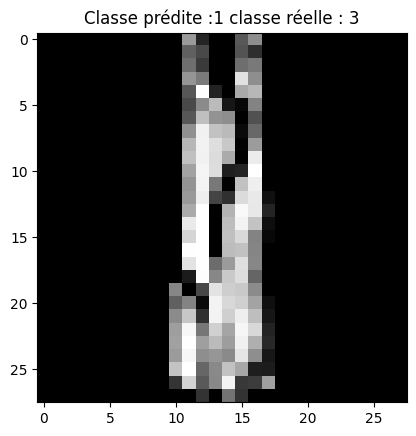

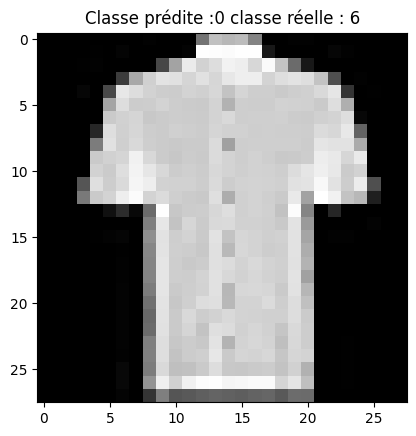

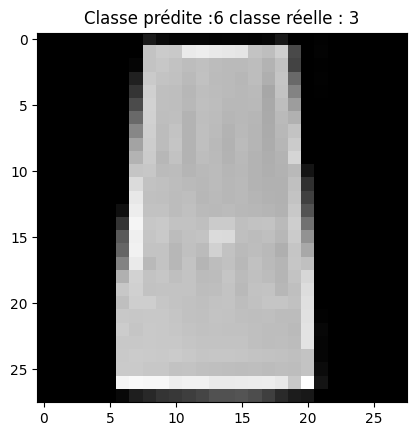

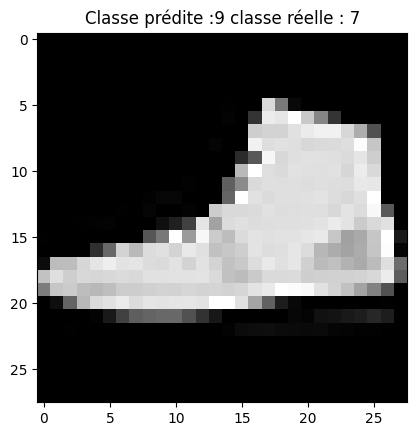

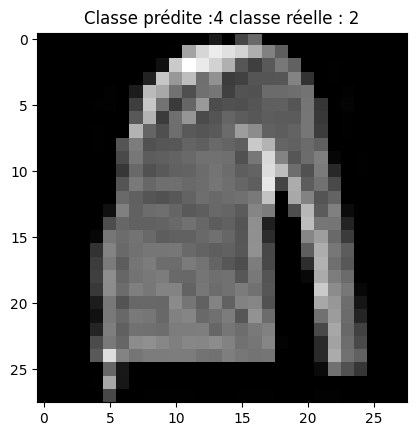

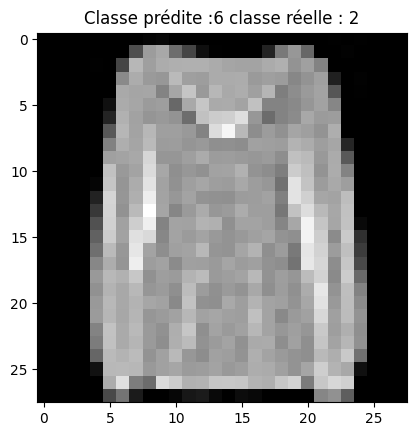

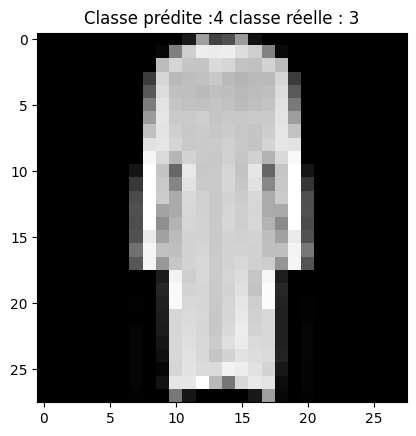

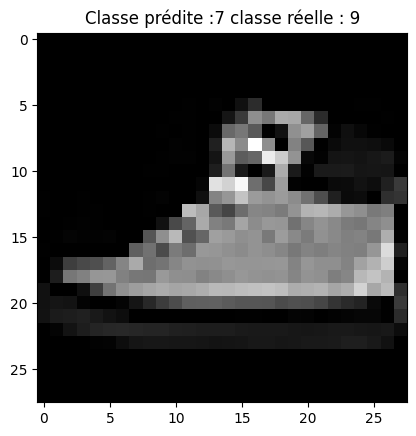

In [ ]:
#indices de classification incorrect
misclassified_idx = np.where(y_pred != y_test)[0]

Xtest = np.expand_dims(X_test, axis = -1)

for i in range(10):
  index = misclassified_idx[i]
  plt.imshow(X_test[index],cmap = 'gray')
  plt.title('Classe prédite :{} classe réelle : {}'.format(y_pred[index],y_test[index]))
  plt.show()

#III - Classification par réseau neuronal convolutif (CNN) 

In [ ]:
#On pose notre de réseau de neurones convolutif
model_cnn = tf.keras.Sequential()

model_cnn.add(tf.keras.layers.Conv2D(64, kernel_size=(4, 4),
                 activation='relu',
                 input_shape=(28, 28, 1)))

model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_cnn.add(tf.keras.layers.Flatten())

model_cnn.add(tf.keras.layers.Dense(128, activation='relu'))

model_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 64)        1088      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,182,154
Trainable params: 1,182,154
Non-trainable params: 0
______________________________________________

In [ ]:
model_cnn.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [ ]:
history2 = model_cnn.fit(images,
                    y_train,
                    epochs = 5,
                    validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 67s 44ms/step - loss: 0.1496 - accuracy: 0.9452 - val_loss: 0.2705 - val_accuracy: 0.9116
Epoch 2/5
1500/1500 [==============================] - 64s 42ms/step - loss: 0.1278 - accuracy: 0.9522 - val_loss: 0.2761 - val_accuracy: 0.9103
Epoch 3/5
1500/1500 [==============================] - 61s 41ms/step - loss: 0.1095 - accuracy: 0.9595 - val_loss: 0.2839 - val_accuracy: 0.9090
Epoch 4/5
1500/1500 [==============================] - 61s 41ms/step - loss: 0.0957 - accuracy: 0.9636 - val_loss: 0.3221 - val_accuracy: 0.9036
Epoch 5/5
1500/1500 [==============================] - 58s 39ms/step - loss: 0.0796 - accuracy: 0.9704 - val_loss: 0.3148 - val_accuracy: 0.9121


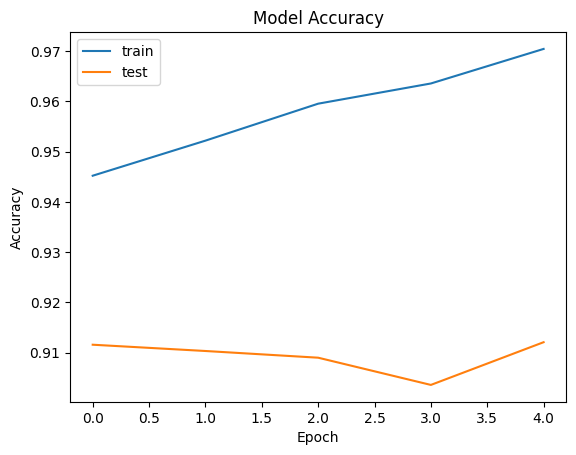

In [ ]:
#Trace les courbes d'évolution de la fonction Loss ainsi que de l'accuracy du modèle lors des itérations
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

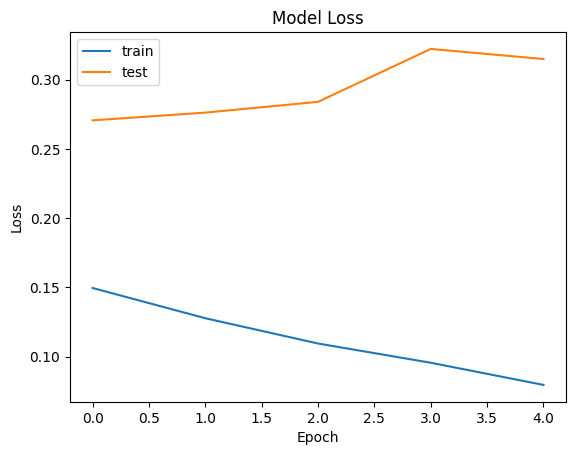

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

313/313 [==============================] - 3s 10ms/step


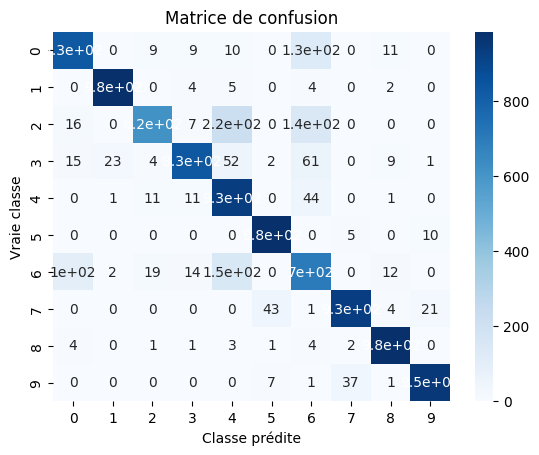

In [ ]:
#Reduire la taille des données pour aller plus vite
# Predict classes for test set
y_pred = model_cnn.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
conf_mat = confusion_matrix(y_test,y_pred)

#Affiche la matrice de confusion
sns.heatmap(conf_mat,annot = True, cmap = 'Blues')
plt.title('Matrice de confusion')
plt.xlabel('Classe prédite')
plt.ylabel('Vraie classe')
plt.show()

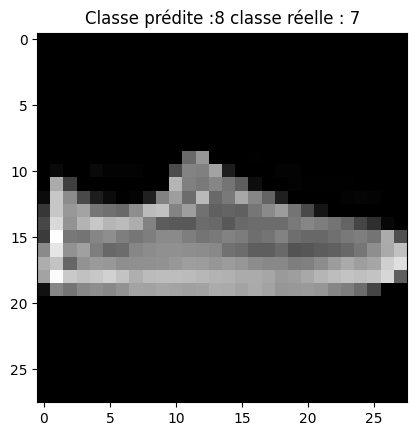

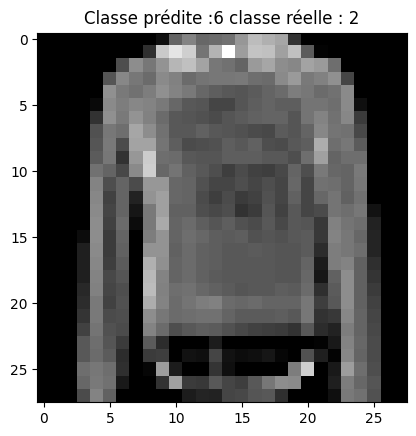

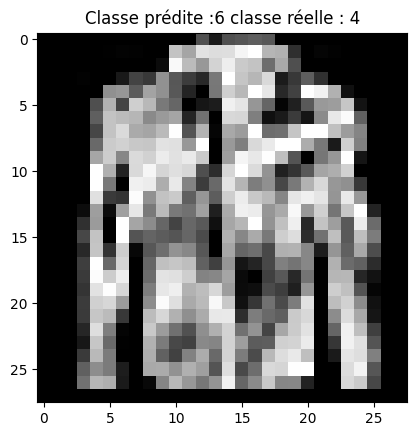

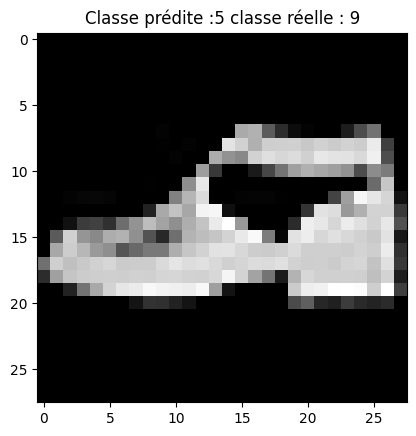

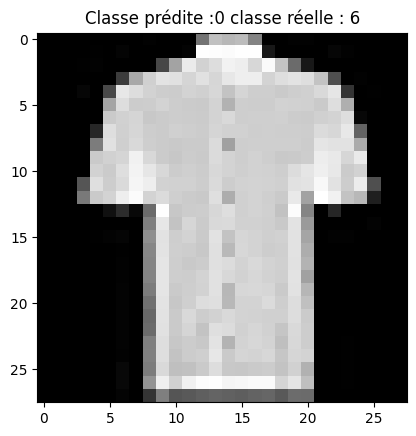

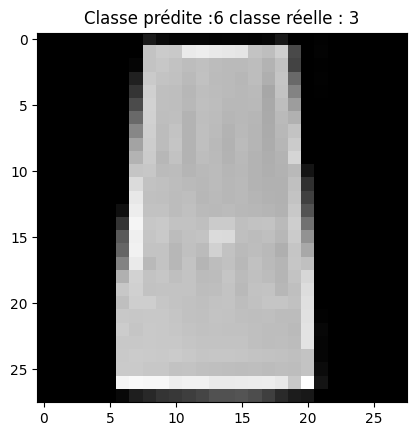

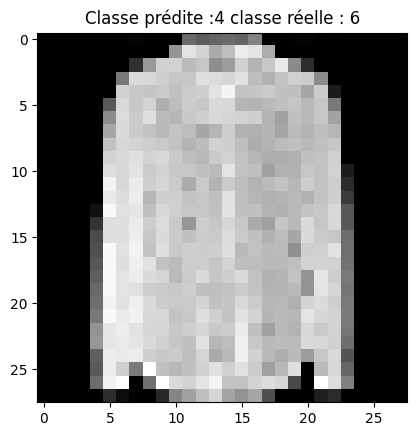

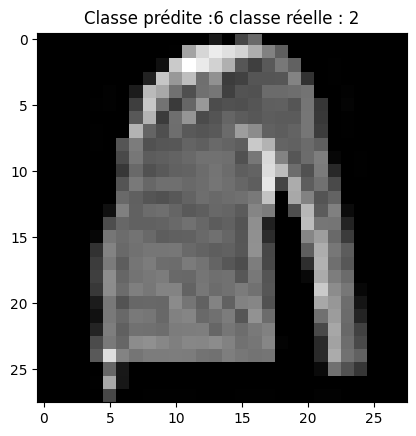

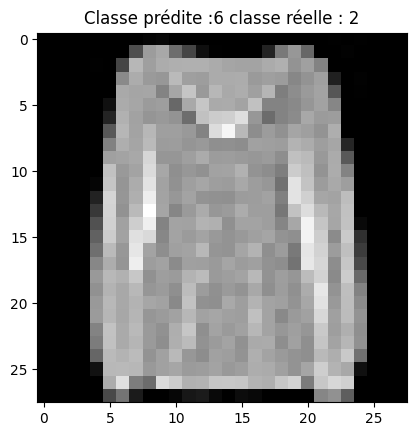

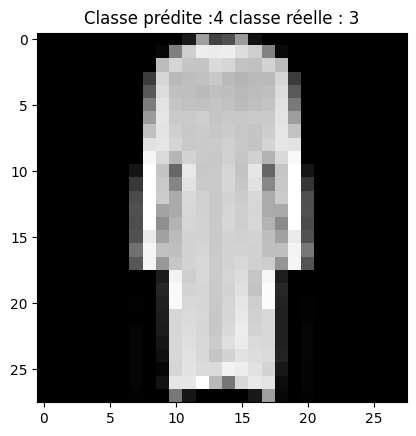

In [ ]:
#indices de classification incorrect
misclassified_idx = np.where(y_pred != y_test)[0]

Xtest = np.expand_dims(X_test, axis = -1)

for i in range(10):
  index = misclassified_idx[i]
  plt.imshow(X_test[index],cmap = 'gray')
  plt.title('Classe prédite :{} classe réelle : {}'.format(y_pred[index],y_test[index]))
  plt.show()

#III - Conclusion

Nous devons noter tout de même que ces données sont déjà nettoyées pour rendre l’apprentissage plus simple. Elle a été constituée à des fins purement pédagogiques mais peut quand même permettre de créer des prototypes de modèles. Suite à notre comparaison des réseaux de neurones denses et convolutifs , on peut établir que les réseaux convolutifs ont un taux de bien classés légérement plus élevé que le réseau dense. La matrice de confusion nous indique quelles images ont été mal classés. Le premier modèle construit donne d’assez bons résultats. Néanmoins, lorsqu’il est question de classification d’images d’objets (et d’analyse d’images en général), il est plus courant d’utiliser des réseaux à convolution.
